In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# LSTM

In [3]:
directory = "./LSTM"
listdir = os.listdir(directory)

lstm = []

for fname in listdir:
    seq_len = int(fname.replace(".json",''))
    path = os.path.join(directory, fname)
    data = json.load(open(path, 'r'))

    params = data["params"]
    depth = data["n_layer"]
    width = params // depth

    train_loss = [el["train_loss"] for el in data["history"]]
    val_loss = [el["val_loss"] for el in data["history"]]

    max_train_loss = max(train_loss)
    min_train_loss = min(train_loss)
    mean_train_loss = sum(train_loss)/len(train_loss)

    train_loss_decrement = [data["history"][i]["train_loss"] - data["history"][i+1]["train_loss"] for i in range(len(data["history"])-1)]
    mean_train_loss_decrement = (sum(train_loss_decrement) / len(train_loss_decrement)) / max_train_loss # normalization

    val_loss_decrement = [data["history"][i]["val_loss"] - data["history"][i+1]["val_loss"] for i in range(len(data["history"])-1)]
    mean_val_loss_decrement = (sum(val_loss_decrement) / len(val_loss_decrement)) / max(val_loss) # normalization

    overfit_ratio = abs(mean_train_loss_decrement / mean_val_loss_decrement)

    train_time = [el["train_time"] for el in data["history"]]
    val_time = [el["val_time"] for el in data["history"]]

    mean_train_time = sum(train_time) / len(train_time)
    mean_val_time = sum(val_time) / len(val_time)

    lstm.append({
        "params" : params,
        "depth" : depth,
        "width" : width,
        "max_train_loss" : max_train_loss,
        "min_train_loss" : min_train_loss,
        "mean_train_loss" : mean_train_loss,
        # "mean_train_loss_decrement" : mean_train_loss_decrement,
        # "mean_val_loss_decrement" : mean_val_loss_decrement,
        "overfit_ratio" : overfit_ratio,
        "mean_train_time" : mean_train_time,
        "mean_val_time" : mean_val_time,
        "bidirectional" : data["bidirectional"],
        "seq_len" : seq_len
    })

In [4]:
lstm = pd.DataFrame(lstm)

In [5]:
import matplotlib.colors as mcolors

def list_matplotlib_colors():
    # Get a dictionary of named colors in Matplotlib
    colors = mcolors.BASE_COLORS
    # Convert the dictionary to a list of color names
    color_list = list(colors.keys())
    return color_list

# Example usage
colors = list_matplotlib_colors()
print(colors)


['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

def scatter(dfs, x, y, labels, xlabel, ylabel):
    x_range_max = 0
    x_range_min = 0
    for i, (df, label) in enumerate(zip(dfs, labels)):
        plt.scatter(df[x], df[y], alpha=0.5, label=label, color=colors[i%len(colors)])

        if df[x].max() > x_range_max:
            x_range_max = df[x].max()
        if df[x].min() < x_range_min:
            x_range_min = df[x].min()
    
    for i, (df, label) in enumerate(zip(dfs, labels)):
        lr = LinearRegression().fit(X=df[[x]], y=df[y])

        gradient = lr.coef_[0]
        intercept = lr.intercept_

        # Generate x values
        x_ = np.linspace(x_range_min, x_range_max, 100)
        # Calculate y values based on the line equation y = mx + b
        y_ = gradient * x_ + intercept

        plt.plot(x_, y_, linestyle="--", color=colors[i%len(colors)])


    plt.legend()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# GPT

In [7]:
directory = "./GPT"
listdir = os.listdir(directory)

gpt = []

for fname in listdir:
    seq_len = int(fname.replace(".json",''))
    path = os.path.join(directory, fname)
    data = json.load(open(path, 'r'))

    params = data["params"]
    depth = data["n_block"]
    width = params // depth

    train_loss = [el["train_loss"] for el in data["history"]]
    val_loss = [el["val_loss"] for el in data["history"]]

    max_train_loss = max(train_loss)
    min_train_loss = min(train_loss)
    mean_train_loss = sum(train_loss)/len(train_loss)

    train_loss_decrement = [data["history"][i]["train_loss"] - data["history"][i+1]["train_loss"] for i in range(len(data["history"])-1)]
    mean_train_loss_decrement = (sum(train_loss_decrement) / len(train_loss_decrement)) / max_train_loss # normalization

    val_loss_decrement = [data["history"][i]["val_loss"] - data["history"][i+1]["val_loss"] for i in range(len(data["history"])-1)]
    mean_val_loss_decrement = (sum(val_loss_decrement) / len(val_loss_decrement)) / max(val_loss) # normalization

    overfit_ratio = abs(mean_train_loss_decrement / mean_val_loss_decrement)

    train_time = [el["train_time"] for el in data["history"]]
    val_time = [el["val_time"] for el in data["history"]]

    mean_train_time = sum(train_time) / len(train_time)
    mean_val_time = sum(val_time) / len(val_time)

    gpt.append({
        "params" : params,
        "depth" : depth,
        "width" : width,
        "max_train_loss" : max_train_loss,
        "min_train_loss" : min_train_loss,
        "mean_train_loss" : mean_train_loss,
        # "mean_train_loss_decrement" : mean_train_loss_decrement,
        # "mean_val_loss_decrement" : mean_val_loss_decrement,
        "overfit_ratio" : overfit_ratio,
        "mean_train_time" : mean_train_time,
        "mean_val_time" : mean_val_time,
        "seq_len" : seq_len
    })

In [8]:
gpt = pd.DataFrame(gpt)

# Seq Len vs Train Time

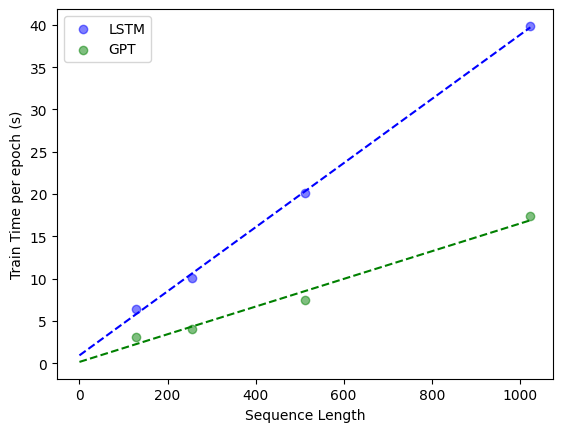

In [9]:
scatter(
    dfs=[lstm, gpt],
    x="seq_len",
    y="mean_train_time",
    labels=["LSTM", "GPT"],
    xlabel="Sequence Length",
    ylabel="Train Time per epoch (s)",
)